In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import PIL
from scipy.fft import fftfreq
from scipy.fft import fft, ifft, fft2, ifft2

from scipy.ndimage import gaussian_filter
from scipy import fftpack

from scipy import signal
from scipy import misc

import imageio
from PIL import Image, ImageDraw

from scipy import fftpack

#####  PIL is the Python Imaging Library (credits : Fredrik Lundh and Contributors.)

In [3]:
img_original = PIL.Image.open("IMG_20211212_163000__01.jpg") #loading the image

In [4]:
img_gray = img_original.convert("L") # converting to true greyscale

In [5]:
img = img_gray.resize((512,512)) # resizing the image

In [6]:
img.save('gray_img_resized.jpg') #saving the image

In [7]:
trees = PIL.Image.open("Trees.jpg") #loading tree image

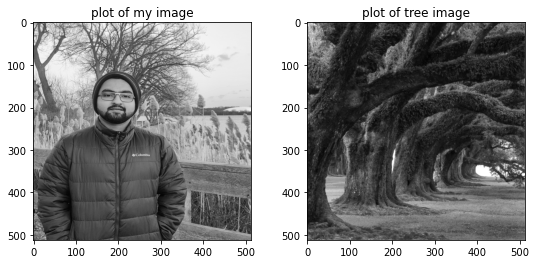

In [8]:
#displaying the images 

plt.figure(figsize=(9, 4))
plt.subplot(121)
plt.imshow(img, cmap='gray')
plt.title("plot of my image")
plt.subplot(122)
plt.imshow(trees, cmap='gray')
plt.title("plot of tree image")
plt.show()

In [9]:
# finding the fft of the two images
img_ft= fft2(img) # my image
trees_ft = fft2(trees) # of the tree

In [10]:
# we need to do fftshift to bring the zero frequency component to the center of the spectrum
#for the image
img_shift = np.fft.fftshift(img_ft)
#for the trees
trees_shift = np.fft.fftshift(trees_ft)

In [11]:
#creating amplitude and phase of the two images

img_amplitude = np.sqrt(np.real(img_shift) ** 2 + np.imag(img_shift) ** 2)
img_phase = np.arctan2(np.imag(img_shift), np.real(img_shift))

trees_amplitude = np.sqrt(np.real(trees_shift) ** 2 + np.imag(trees_shift) ** 2)
trees_phase = np.arctan2(np.imag(trees_shift), np.real(trees_shift))

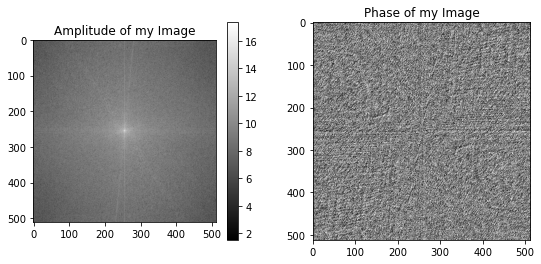

In [12]:
plt.figure(figsize=(9, 4))

plt.subplot(121)
plt.imshow(np.log(img_amplitude+1e-10), cmap='gray')
plt.colorbar()
plt.title("Amplitude of my Image")
plt.subplot(122)
plt.imshow(img_phase, cmap='gray')
plt.title("Phase of my Image")
plt.show()

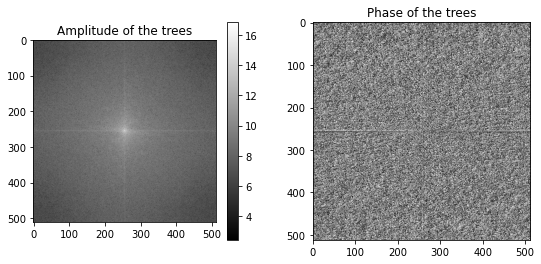

In [13]:
plt.figure(figsize=(9, 4))

plt.subplot(121)
plt.imshow(np.log(trees_amplitude+1e-10), cmap='gray')
plt.colorbar()
plt.title("Amplitude of the trees")
plt.subplot(122)
plt.imshow(trees_phase, cmap='gray')
plt.title("Phase of the trees")
plt.show()

In [14]:
# amplitude_phase combination

#my image and tree

img_trees_comb = np.multiply(img_amplitude, np.exp(1j * trees_phase))
img_trees = np.fft.ifft2(img_trees_comb)  # inverse fourrier transform

In [15]:
# amplitude_phase combination

#trees and my image

trees_img_comb = np.multiply(trees_amplitude, np.exp(1j * img_phase))
trees_img = np.fft.ifft2(trees_img_comb)  # inverse fourrier transform

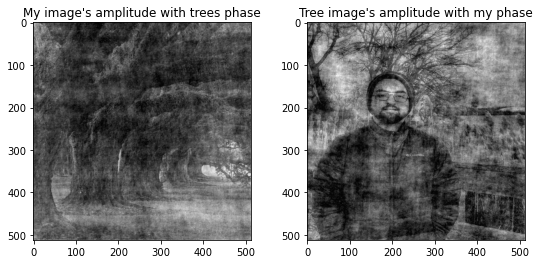

In [16]:
plt.figure(figsize=(9, 4))

plt.subplot(121)
plt.imshow(np.abs(img_trees), cmap='gray')
plt.title("My image's amplitude with trees phase")
plt.subplot(122)
plt.imshow(np.abs(trees_img), cmap='gray')
plt.title("Tree image's amplitude with my phase")
plt.show()

### Clearly Phase is the dominant factor

The image which was formed by combining the amplitude of the tree image along with the phase of my image is what results in my image showing up more dominantly, showing that phase carries more priority than amplitude. This is because phase contains the spatial information about the positions of the intensity.

### Gaussian Smoothing

In [59]:
def fwhm2sigma(fwhm):
    return fwhm / np.sqrt(8 * np.log(2))

FWHM = 20
sigma = fwhm2sigma(FWHM)

In [60]:
n_points = 512
#The Gaussian Kernel

dx = 0.1
dy = 0.1
x = np.arange(-1, 1, dx)
y = np.arange(-1, 1, dy)
x2d, y2d = np.meshgrid(x, y)
kernel_2d = np.exp(-(x2d ** 2 + y2d ** 2) / (2 * sigma ** 2))
kernel_2d = kernel_2d / (2 * np.pi * sigma ** 2) # unit integral

In [61]:
blurred_img = signal.fftconvolve(face, kernel_2d, mode='same')

<ipython-input-62-e3a3b44516f0>:11: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


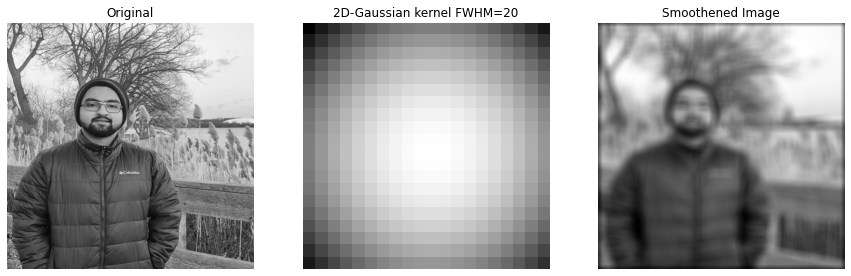

In [62]:
fig, (ax_orig, ax_kernel, ax_blurred) = plt.subplots(1,3,figsize=(15, 15))
ax_orig.imshow(face, cmap='gray')
ax_orig.set_title('Original')
ax_orig.set_axis_off()
ax_kernel.imshow(kernel_2d, cmap='gray')
ax_kernel.set_title('2D-Gaussian kernel FWHM=20')
ax_kernel.set_axis_off()
ax_blurred.imshow(blurred_img, cmap='gray')
ax_blurred.set_title('Smoothened Image')
ax_blurred.set_axis_off()
fig.show()

### Image Filtering

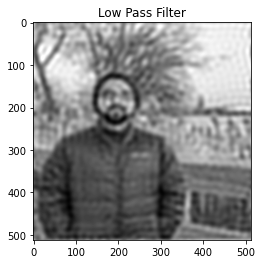

In [35]:
# low pass filter <20 case

image1 = imageio.imread('gray_img_resized.jpg',as_gray=True)

#convert image to numpy array
image1_np=np.array(image1)

#fft of image
fft1 = fftpack.fftshift(fftpack.fft2(image1_np))

#Create a low pass filter image
x,y = image1_np.shape[0],image1_np.shape[1]
#size of circle
e_x,e_y=60,60
#create a box 
bbox=((x/2)-(e_x/2),(y/2)-(e_y/2),(x/2)+(e_x/2),(y/2)+(e_y/2))

low_pass=Image.new("L",(image1_np.shape[0],image1_np.shape[1]),color=0)

draw1=ImageDraw.Draw(low_pass)
draw1.ellipse(bbox, fill=1)

low_pass_np=np.array(low_pass)

#multiply both the images
filtered=np.multiply(fft1,low_pass_np)

#inverse fft
ifft2 = np.real(fftpack.ifft2(fftpack.ifftshift(filtered)))
ifft2 = np.maximum(0, np.minimum(ifft2, 255))

#save the image
imageio.imsave('fft-then-ifft.png', ifft2.astype(np .uint8))

plt.imshow(ifft2,cmap="gray" )
plt.title("Low Pass Filter")

plt.show()

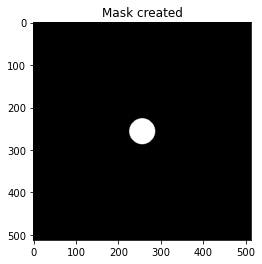

In [36]:
plt.imshow((low_pass),cmap='gray')
plt.title("Mask created")
plt.show()

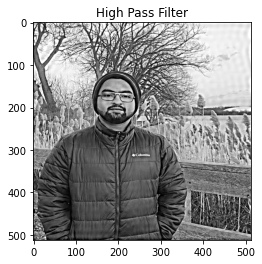

In [45]:
# high pass filter

image1 = imageio.imread('gray_img_resized.jpg',as_gray=True)

#convert image to numpy array
image1_np=np.array(image1)

#fft of image
fft1 = fftpack.fftshift(fftpack.fft2(image1_np))

#Create a low pass filter image
x,y = image1_np.shape[0],image1_np.shape[1]
#size of circle
e_x,e_y=60,60
#create a box 
bbox=((x/2)-(e_x/2),(y/2)-(e_y/2),(x/2)+(e_x/2),(y/2)+(e_y/2))

low_pass=Image.new("L",(image1_np.shape[0],image1_np.shape[1]),color=2)

draw1=ImageDraw.Draw(low_pass)
draw1.ellipse(bbox, fill=1)

high_pass_np=np.array(low_pass)

#multiply both the images
filtered=np.multiply(fft1,high_pass_np)

#inverse fft
ifft2 = np.real(fftpack.ifft2(fftpack.ifftshift(filtered)))
ifft2 = np.maximum(0, np.minimum(ifft2, 255))

#save the image
imageio.imsave('fft-then-ifft.png', ifft2.astype(np .uint8))

plt.imshow(ifft2,cmap="gray" )
plt.title("High Pass Filter")


plt.show()

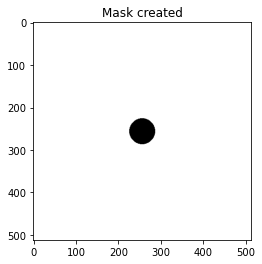

In [38]:
plt.imshow((low_pass),cmap='gray')
plt.title("Mask created")
plt.show()